In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [4]:
df=pd.read_csv("mall customers - mall customers.csv")

In [5]:
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [6]:
df=df.drop('CustomerID',axis=1)

In [7]:
df.head()

,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,Male,19,15,39
1,Male,21,15,81
2,Female,20,16,6
3,Female,23,16,77
4,Female,31,17,40


In [8]:
df=df.rename(columns={'Annual Income (k$)':'income','Spending Score (1-100)':'score'})

In [9]:
df.head()

,Gender,Age,income,score
0,Male,19,15,39
1,Male,21,15,81
2,Female,20,16,6
3,Female,23,16,77
4,Female,31,17,40


In [11]:
from sklearn.cluster import KMeans

In [10]:
wcss=[]

In [12]:
for k in range(1,15):
    kn=KMeans(n_clusters=k)
    kn.fit(df[['income','score']])
    wcss.append(kn.inertia_)

In [13]:
from kneed import KneeLocator

In [27]:
ran=range(1,15)

In [31]:
kn=KneeLocator(ran,wcss,direction='decreasing',curve='convex')

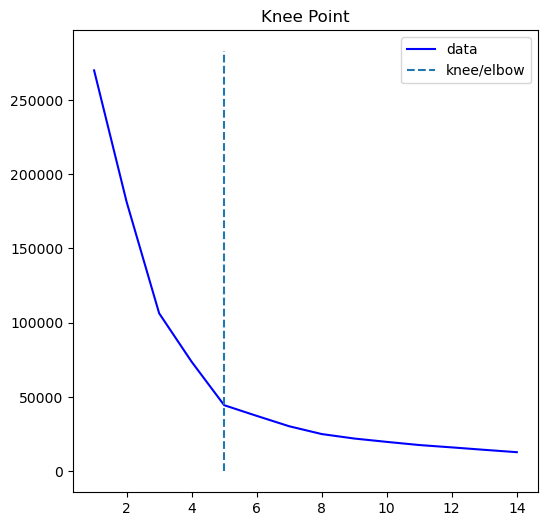

In [32]:
kn.plot_knee()

In [34]:
km=KMeans(n_clusters=5)

In [35]:
km.fit(df[['income','score']])

KMeans(n_clusters=5)

In [41]:
df['claster']=km.predict(df[['income','score']])

In [42]:
df.head()

,Gender,Age,income,score,claser,claster
0,Male,19,15,39,4,4
1,Male,21,15,81,2,2
2,Female,20,16,6,4,4
3,Female,23,16,77,2,2
4,Female,31,17,40,4,4


In [43]:
df.claster.max()

4

In [48]:
df.claster.min()

0

In [54]:
df0=df[df.claser==0]

In [55]:
df1=df[df.claser==1]

In [56]:
df2=df[df.claser==2]

In [57]:
df3=df[df.claser==3]

In [58]:
df4=df[df.claser==4]

In [59]:
df5=df[df.claser==5]

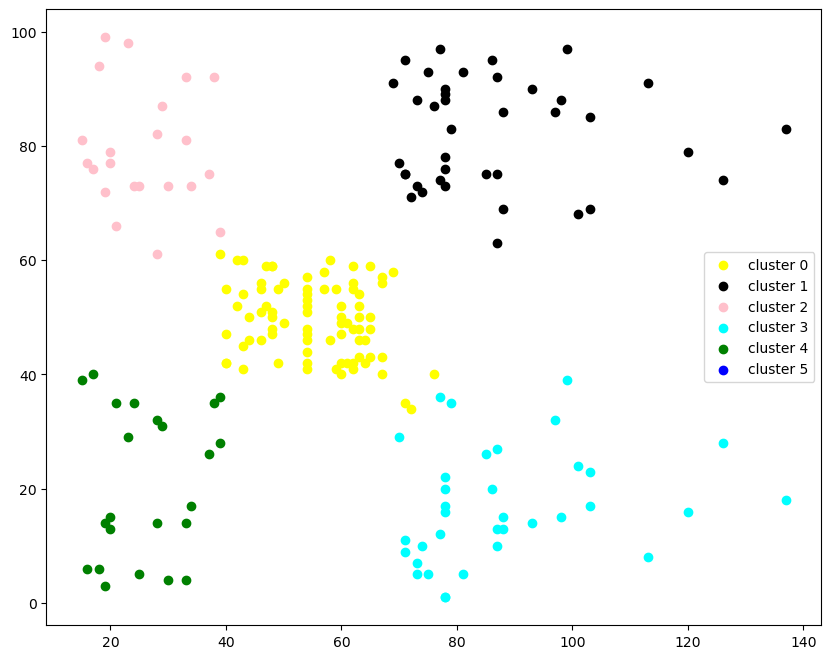

In [64]:
plt.figure(figsize=(10,8))
plt.scatter(df0.income, df0.score, color='yellow', label='cluster 0')
plt.scatter(df1.income, df1.score, color='black', label='cluster 1')
plt.scatter(df2.income, df2.score, color='pink', label='cluster 2')
plt.scatter(df3.income, df3.score, color='cyan', label='cluster 3')
plt.scatter(df4.income, df4.score, color='green', label='cluster 4')
plt.scatter(df5.income, df5.score, color='blue', label='cluster 5')

plt.legend()
